In [1]:
import os
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import glob

d:\develop\python\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
d:\develop\python\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
d:\develop\python\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
d:\develop\python\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:544: FutureWarning: Passi

In [2]:
tf.__version__

'2.0.0-rc2'

In [3]:
train_image_path = glob.glob('E:\\study\\tensorflow\\data\\dc_2000\\train\\*\\*.jpg')

In [4]:
len(train_image_path)

2000

In [5]:
train_image_path[:5]

['E:\\study\\tensorflow\\data\\dc_2000\\train\\cat\\cat.0.jpg',
 'E:\\study\\tensorflow\\data\\dc_2000\\train\\cat\\cat.1.jpg',
 'E:\\study\\tensorflow\\data\\dc_2000\\train\\cat\\cat.10.jpg',
 'E:\\study\\tensorflow\\data\\dc_2000\\train\\cat\\cat.100.jpg',
 'E:\\study\\tensorflow\\data\\dc_2000\\train\\cat\\cat.101.jpg']

In [6]:
train_image_path[-5:]

['E:\\study\\tensorflow\\data\\dc_2000\\train\\dog\\dog.995.jpg',
 'E:\\study\\tensorflow\\data\\dc_2000\\train\\dog\\dog.996.jpg',
 'E:\\study\\tensorflow\\data\\dc_2000\\train\\dog\\dog.997.jpg',
 'E:\\study\\tensorflow\\data\\dc_2000\\train\\dog\\dog.998.jpg',
 'E:\\study\\tensorflow\\data\\dc_2000\\train\\dog\\dog.999.jpg']

In [7]:
p = 'E:\\study\\tensorflow\\data\\dc_2000\\train\\dog\\dog.995.jpg'
p.split('\\')[-2]

'dog'

In [8]:
train_image_label = [int(p.split('\\')[-2] == 'cat') for p in train_image_path]

In [9]:
train_image_label[-5:]

[0, 0, 0, 0, 0]

In [10]:
def load_preprosess_image(path, label):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image,[256,256])
    #图片增强
    image = tf.image.random_crop(image,[256,256,3])
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.random_brightness(image,0.5)
    image = tf.image.random_contrast(image,0,1)
    
    image = tf.cast(image, tf.float32)
    image = image/255
    label = tf.reshape(label,[1])
    return image, label

In [36]:
# tf.image.convert_image_dtype()

train_image_ds = tf.data.Dataset.from_tensor_slices((train_image_path,train_image_label))

In [37]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_image_ds = train_image_ds.map(load_preprosess_image, num_parallel_calls=AUTOTUNE)

In [38]:
train_image_ds

<ParallelMapDataset shapes: ((256, 256, 3), (1,)), types: (tf.float32, tf.int32)>

In [39]:
BATCH_SIZE = 32
train_count = len(train_image_path)

In [50]:
train_count

2000

In [40]:
train_image_ds = train_image_ds.shuffle(train_count).repeat().batch(BATCH_SIZE)
train_image_ds = train_image_ds.prefetch(AUTOTUNE)

In [72]:
test_image_path = glob.glob('E:\\study\\tensorflow\\data\\dc_2000\\test\\*\\*.jpg')

test_image_label = [int(p.split('\\')[-2] == 'cat') for p in test_image_path]

test_image_ds = tf.data.Dataset.from_tensor_slices((test_image_path,test_image_label))

test_image_ds = test_image_ds.map(load_preprosess_image,num_parallel_calls=AUTOTUNE)

test_image_ds = test_image_ds.batch(BATCH_SIZE)
test_image_ds = test_image_ds.prefetch(AUTOTUNE)

In [70]:
len(test_image_path)

1000

In [41]:
imgs, labels = next(iter(train_image_ds))

In [42]:
imgs.shape

TensorShape([32, 256, 256, 3])

In [43]:
labels.shape

TensorShape([32, 1])

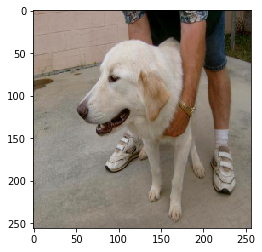

In [44]:
plt.imshow(imgs[0])

In [45]:
labels[0]

<tf.Tensor: id=633, shape=(1,), dtype=int32, numpy=array([0])>

In [46]:
model = keras.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),input_shape=(256,256,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(256,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(512,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(1024,(3,3), activation='relu'),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 254, 254, 64)      1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 127, 127, 64)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 125, 125, 128)     73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 62, 62, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 60, 60, 256)       295168    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 30, 30, 256)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 512)      

In [47]:
pred = model(imgs)

In [48]:
pred.shape

TensorShape([32, 1])

In [54]:
np.array([p[0].numpy() for p in tf.cast(pred > 0,tf.int64)])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [55]:
ls = tf.keras.losses.BinaryCrossentropy()

In [56]:
ls([0.,0.],[1.,2.])

<tf.Tensor: id=1452, shape=(), dtype=float32, numpy=15.333239>

In [57]:
optimizer = tf.keras.optimizers.Adam()

In [73]:
epoch_loss_avg = tf.keras.metrics.Mean('train_loss')
train_accuracy = tf.keras.metrics.Accuracy()

epoch_loss_avg_test = tf.keras.metrics.Mean('test_loss')
test_accuracy = tf.keras.metrics.Accuracy()


In [74]:
train_accuracy([1,2,3],[1,1,1])

<tf.Tensor: id=43771, shape=(), dtype=float32, numpy=0.33333334>

In [75]:
def train_step(model, image, labels):
    with tf.GradientTape() as t:
        pred = model(image)
        loss_step = tf.keras.losses.BinaryCrossentropy(from_logits=True)(labels,pred)
    grads = t.gradient(loss_step,model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
    
    epoch_loss_avg(loss_step)
    train_accuracy(labels,tf.cast(pred>0,tf.int32))

In [77]:
def test_step(model, image, labels):
#     pred = model.predict(image)
    pred = model(image,training=False)
    loss_step = tf.keras.losses.BinaryCrossentropy(from_logits=True)(labels,pred)
    epoch_loss_avg_test(loss_step)
    test_accuracy(labels,tf.cast(pred>0,tf.int32))

In [78]:
train_loss_result = []
train_acc_result = []

test_loss_result = []
test_acc_result = []


In [66]:
num_epochs = 30

In [79]:
for epoch in range(num_epochs):
    for imgs_,labels_ in train_image_ds:
        train_step(model, imgs_, labels_)
        print('.',end='')
    print()
    
    train_loss_result.append(epoch_loss_avg.result())
    train_acc_result.append(train_acc_result.result())
    
    for imgs_,labels_ in test_image_ds:
        test_step(model, imgs_, labels_)
    
    test_loss_result.append(epoch_loss_avg_test.result())
    test_acc_result.append(test_acc_result.result())
    
    print('Epoch:{}: loss:{:.3f}, accuracy:{:.3f},test_loss:{},test_acc:{}'.format(
        epoch+1,
        epoch_loss_avg.result(),
        train_acc_result.result(),
        epoch_loss_avg_test.result(),
        test_acc_result.result()
    ))
    
    epoch_loss_avg.reset_states()
    train_acc_result.reset_states()
    epoch_loss_avg_test.reset_states()
    test_acc_result.reset_states()

.

KeyboardInterrupt: 